In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Load the dataset
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [45]:
print(data.head())
print(data.info())
print(data.describe())


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 

In [61]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [50]:
# Data Splitting and Preprocessing:
# Split data into features and target variable
X = data.drop(columns=['Chance of Admit ']) #features
y = data['Chance of Admit '] #target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [51]:
# Model Training and Evaluation:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse}, R2: {r2}")


Linear Regression - MSE: 0.003551180545098712, R2: 0.826348139603975


In [57]:
# Display a few rows to verify predictions
predictions_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': y_pred.flatten()
})

print(predictions_df.head())

   Actual Values  Predicted Values
0           0.93          0.926719
1           0.84          0.778928
2           0.39          0.585841
3           0.77          0.700333
4           0.74          0.804489


In [53]:
# Define the Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer="adam", loss="mean_squared_error")

# Train the Neural Network model
history = nn_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=2)

# Predict on the test data
y_nn_pred = nn_model.predict(X_test).flatten()

# Evaluate the Neural Network model
nn_mse = mean_squared_error(y_test, y_nn_pred)
nn_r2 = r2_score(y_test, y_nn_pred)
print(f"Neural Network - MSE: {nn_mse}, R2: {nn_r2}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 - 2s - 178ms/step - loss: 0.0808 - val_loss: 0.0705
Epoch 2/100
10/10 - 0s - 37ms/step - loss: 0.0436 - val_loss: 0.0616
Epoch 3/100
10/10 - 0s - 14ms/step - loss: 0.0297 - val_loss: 0.0438
Epoch 4/100
10/10 - 0s - 12ms/step - loss: 0.0237 - val_loss: 0.0405
Epoch 5/100
10/10 - 0s - 7ms/step - loss: 0.0187 - val_loss: 0.0356
Epoch 6/100
10/10 - 0s - 7ms/step - loss: 0.0156 - val_loss: 0.0321
Epoch 7/100
10/10 - 0s - 6ms/step - loss: 0.0133 - val_loss: 0.0278
Epoch 8/100
10/10 - 0s - 10ms/step - loss: 0.0114 - val_loss: 0.0266
Epoch 9/100
10/10 - 0s - 14ms/step - loss: 0.0099 - val_loss: 0.0213
Epoch 10/100
10/10 - 0s - 11ms/step - loss: 0.0087 - val_loss: 0.0215
Epoch 11/100
10/10 - 0s - 8ms/step - loss: 0.0078 - val_loss: 0.0188
Epoch 12/100
10/10 - 0s - 12ms/step - loss: 0.0068 - val_loss: 0.0167
Epoch 13/100
10/10 - 0s - 15ms/step - loss: 0.0062 - val_loss: 0.0161
Epoch 14/100
10/10 - 0s - 8ms/step - loss: 0.0057 - val_loss: 0.0142
Epoch 15/100
10/10 - 0s - 6ms/step - loss: 0.

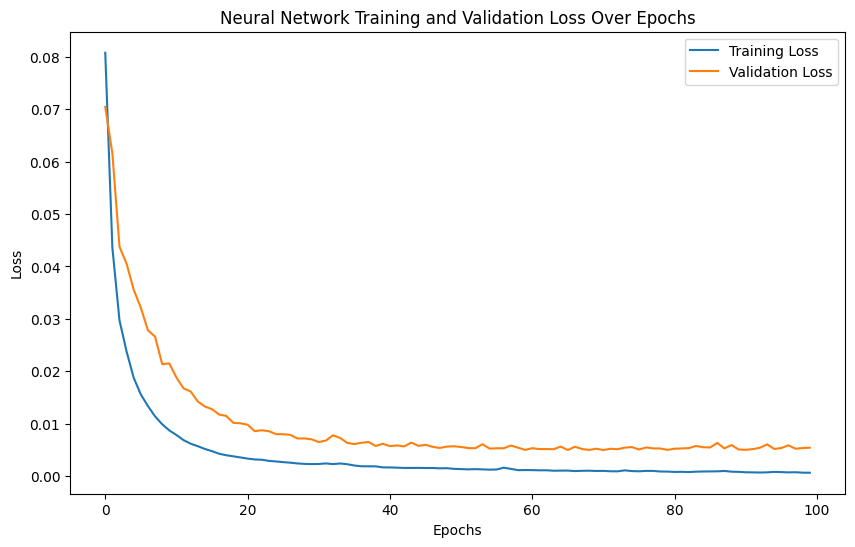

In [69]:
import matplotlib.pyplot as plt
# Plot the loss over epochs for Neural Network
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


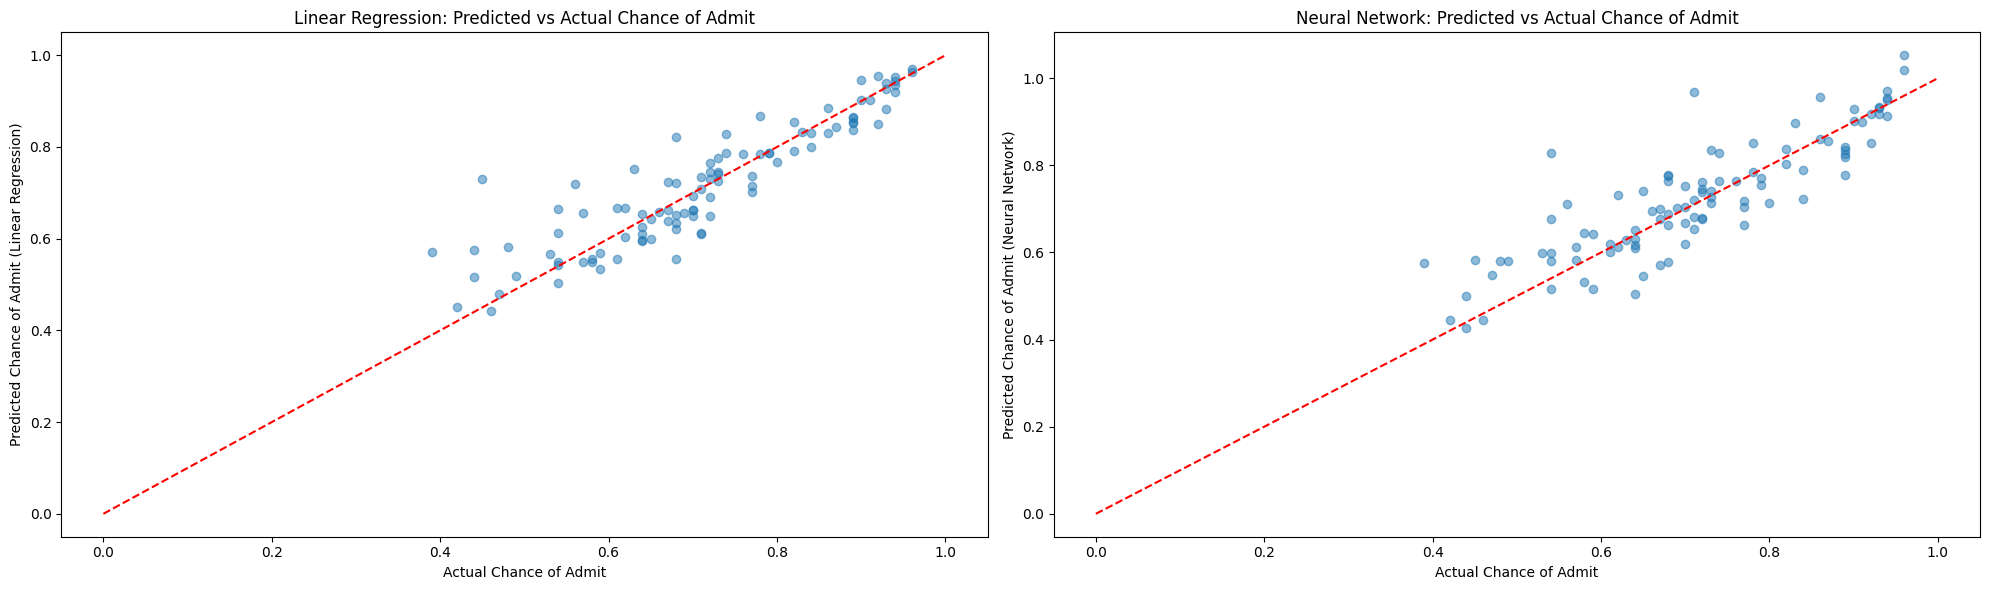

In [68]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot for Linear Regression
axs[0].scatter(y_test, y_pred, alpha=0.5)
axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0].set_xlabel('Actual Chance of Admit')
axs[0].set_ylabel('Predicted Chance of Admit (Linear Regression)')
axs[0].set_title('Linear Regression: Predicted vs Actual Chance of Admit')

# Plot for Neural Network
axs[1].scatter(y_test, y_nn_pred, alpha=0.5)
axs[1].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[1].set_xlabel('Actual Chance of Admit')
axs[1].set_ylabel('Predicted Chance of Admit (Neural Network)')
axs[1].set_title('Neural Network: Predicted vs Actual Chance of Admit')

# Show plots
plt.tight_layout()
plt.show()
